<a href="https://www.kaggle.com/code/hikmatullahmohammadi/playground-sep-2022-step-by-step-score-12-1347?scriptVersionId=107890526" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Welcome to Playground Sep 2022 (step by step)

In [4]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# get the dataset
train_df = pd.read_csv('../input/tabular-playground-series-sep-2022/train.csv', index_col=0)
test_df = pd.read_csv('../input/tabular-playground-series-sep-2022/test.csv', index_col=0)
train_df.head()

,date,country,store,product,num_sold
row_id,,,,,
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


## Data Exploration

In [6]:
# shape
train_df.shape

(70128, 5)

The dataset has **70128** observations (rows) and **5** features (columns)

In [7]:
# data types
train_df.dtypes

date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [8]:
# high level overview
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [9]:
train_df['num_sold'].describe(percentiles=[.25, .75, .80, .90, .95, .98])

count    70128.000000
mean       194.296986
std        126.893874
min         19.000000
25%         95.000000
50%        148.000000
75%        283.000000
80%        315.000000
90%        389.000000
95%        437.000000
98%        486.000000
max        986.000000
Name: num_sold, dtype: float64

In [10]:
train_X = train_df.iloc[:, :-1]
train_y = train_df['num_sold']

In [11]:
# concatinate the test and train datasets to do some preprocessing on both
train_test_X = train_X.append(test_df)
train_test_X.tail()

,date,country,store,product
row_id,,,,
87643,2021-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose
87644,2021-12-31,Spain,KaggleRama,Kaggle Advanced Techniques
87645,2021-12-31,Spain,KaggleRama,Kaggle Getting Started
87646,2021-12-31,Spain,KaggleRama,Kaggle Recipe Book
87647,2021-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose


#### Date Features

In [12]:
# seperate the data into year, month and day
train_test_X['year'] = train_test_X['date'].apply(lambda x: x.split('-')[0])
train_test_X['month'] = train_test_X['date'].apply(lambda x: x.split('-')[1])
train_test_X['day'] = train_test_X['date'].apply(lambda x: x.split('-')[2])

In [13]:
train_test_X.drop('date', axis=1, inplace=True)
train_test_X.head()

,country,store,product,year,month,day
row_id,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,01,01
1,Belgium,KaggleMart,Kaggle Getting Started,2017,01,01
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,01,01
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,01,01
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,01,01


In [14]:
# change the data types of year, month and day
train_test_X[['year', 'month', 'day']] = train_test_X[['year', 'month', 'day']].astype('int')
train_test_X.dtypes

country    object
store      object
product    object
year        int64
month       int64
day         int64
dtype: object

In [15]:
# create new feature 'season'
def get_season(month):
    '''
        return 0 for months 1-3,
            1 for months 4-6,
            2 for months 7-9,
            3 otherwise
    '''
    m = month
    if m in [1, 2, 3]: return 0
    elif m in [4, 5, 6]: return 1
    elif m in [7, 8, 9]: return 2
    else: return 3
train_test_X['season'] = train_test_X['month'].apply(get_season)
train_test_X.head()

,country,store,product,year,month,day,season
row_id,,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,0
1,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,0
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,0
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,0
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,0


In [16]:
train_test_X['season'].value_counts()

2    22080
3    22080
1    21840
0    21648
Name: season, dtype: int64

#### Country Feature

In [17]:
train_test_X['country'].value_counts()

Belgium    14608
France     14608
Germany    14608
Italy      14608
Poland     14608
Spain      14608
Name: country, dtype: int64

#### Store Feature

In [18]:
train_test_X['store'].value_counts()

KaggleMart    43824
KaggleRama    43824
Name: store, dtype: int64

#### Product Feature

In [19]:
train_test_X['product'].value_counts()

Kaggle Advanced Techniques          21912
Kaggle Getting Started              21912
Kaggle Recipe Book                  21912
Kaggle for Kids: One Smart Goose    21912
Name: product, dtype: int64

In [20]:
# create a train df for visualization and EDA
train_df = train_test_X.iloc[:train_y.shape[0], :]
# add num_sold
train_df = train_df.join(train_y)
train_df.shape

(70128, 8)

## EDA (Explanatory Data Analysis)

In [21]:
train_df.corr()['num_sold']

year        0.100914
month       0.001004
day         0.007803
season     -0.001857
num_sold    1.000000
Name: num_sold, dtype: float64

##### Get the number of stores in different countries

In [22]:
pd.crosstab(
    index=train_df['country'],
    columns=train_df['store']
)

store,KaggleMart,KaggleRama
country,,
Belgium,5844,5844
France,5844,5844
Germany,5844,5844
Italy,5844,5844
Poland,5844,5844
Spain,5844,5844


##### The number of items sold in each year

In [23]:
num_sold_year = train_df.groupby('year')['num_sold'].sum()
num_sold_year

year
2017    3112163
2018    3425424
2019    3232879
2020    3855193
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each year')

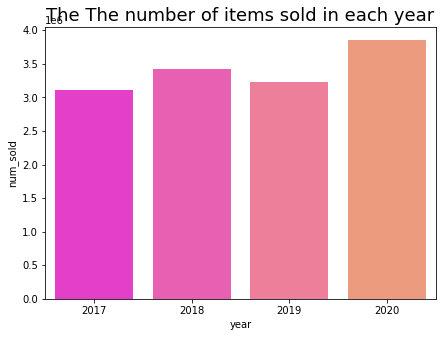

In [24]:
plt.figure(figsize=(7, 5))
sns.set_palette('spring')
ax = sns.barplot(x=num_sold_year.index, y=num_sold_year)
ax.set_title('The The number of items sold in each year', fontdict={'fontsize':18})

Total number of items sold in **2020** is the highest

##### The number of items sold in each month

In [25]:
num_sold_month = train_df.groupby('month')['num_sold'].sum()
num_sold_month

month
1     1244928
2     1086253
3     1147079
4     1076549
5     1142837
6     1088330
7     1109652
8     1115626
9     1064882
10    1119781
11    1130230
12    1299512
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each month')

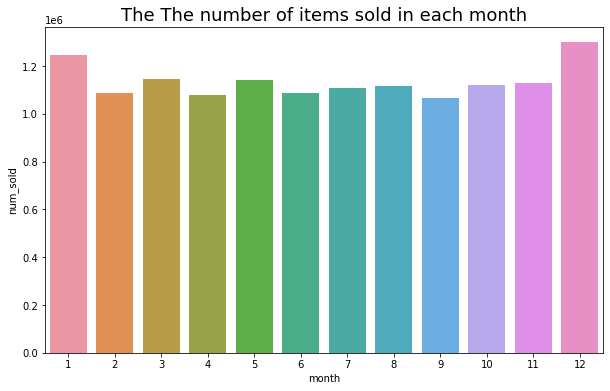

In [26]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=num_sold_month.index, y=num_sold_month)
ax.set_title('The The number of items sold in each month', fontdict={'fontsize':18})

Total numbers of items sold in **January** and **December** are the highest

##### The number of items sold in each season

In [27]:
num_sold_season = train_df.groupby('season')['num_sold'].sum()
num_sold_season

season
0    3478260
1    3307716
2    3290160
3    3549523
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each season')

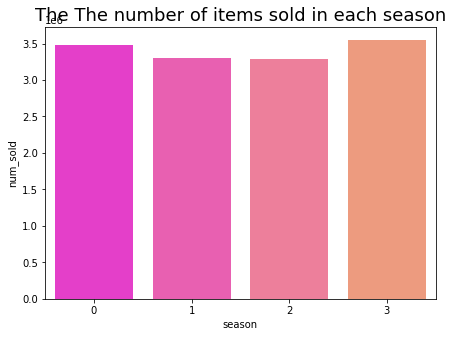

In [28]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=num_sold_season.index, y=num_sold_season)
ax.set_title('The The number of items sold in each season', fontdict={'fontsize':18})

##### The number of items sold in each country

In [29]:
num_sold_country = train_df.groupby('country')['num_sold'].sum()
num_sold_country.sort_values(ascending=False)

country
Germany    2786415
Belgium    2781050
France     2512319
Italy      2201092
Spain      2003238
Poland     1341545
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each country')

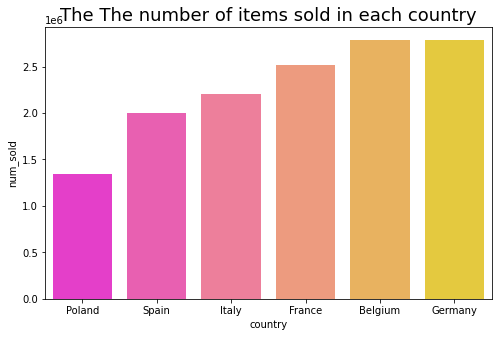

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=num_sold_country.sort_values().index, y=num_sold_country.sort_values())
ax.set_title('The The number of items sold in each country', fontdict={'fontsize':18})

Total numbers of items sold in **Germany** and **Belgium** are the highest

##### The number of items sold in each store

In [31]:
num_sold_store = train_df.groupby('store')['num_sold'].sum()
num_sold_store

store
KaggleMart    10117254
KaggleRama     3508405
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The The number of items sold in each store')

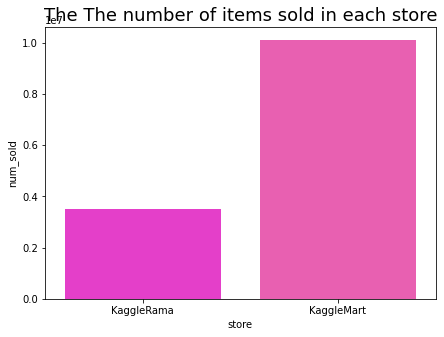

In [32]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=num_sold_store.sort_values().index, y=num_sold_store.sort_values())
ax.set_title('The The number of items sold in each store', fontdict={'fontsize':18})

Total number of items sold in **KaggleMart** stores is higher than that of **KaggleRama**

##### The number of items sold from each product

In [33]:
num_sold_product = train_df.groupby('product')['num_sold'].sum()
num_sold_product

product
Kaggle Advanced Techniques          3913910
Kaggle Getting Started              3136903
Kaggle Recipe Book                  2349817
Kaggle for Kids: One Smart Goose    4225029
Name: num_sold, dtype: int64

Text(0.5, 1.0, 'The number of items sold from each product')

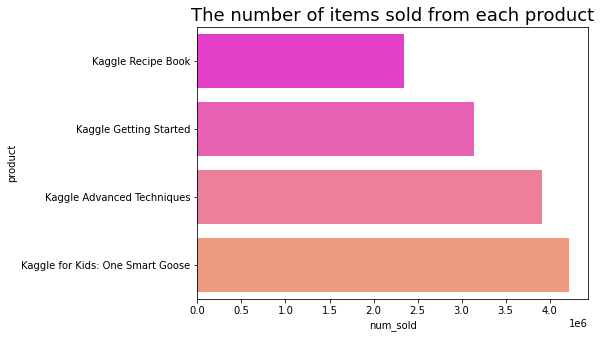

In [34]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(y=num_sold_product.sort_values().index, x=num_sold_product.sort_values())
ax.set_title('The number of items sold from each product', fontdict={'fontsize':18})

### Number of items sold VS country, season, year, month

Text(0.5, 1.0, 'Month VS Num_sold')

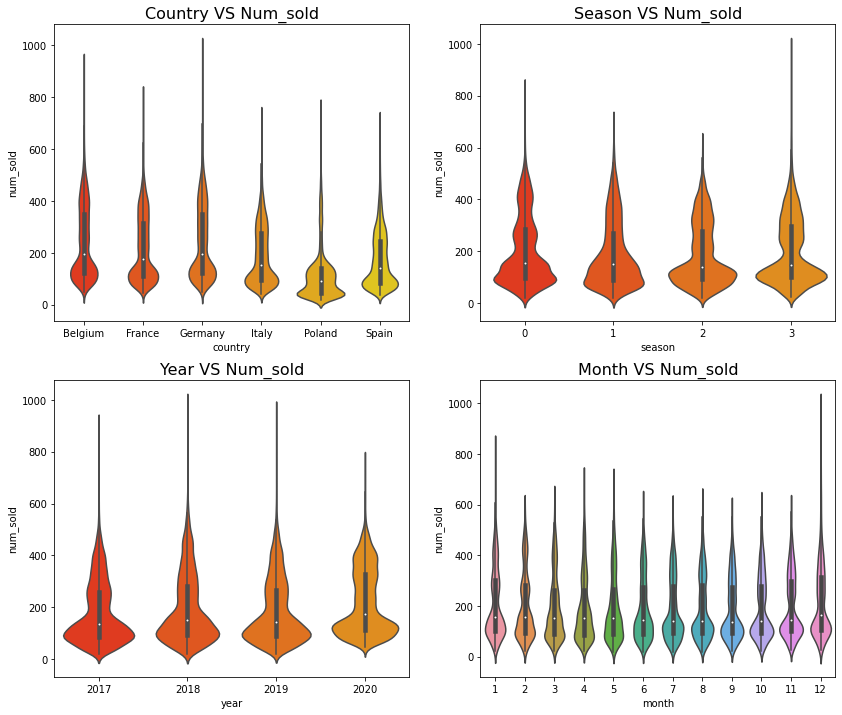

In [35]:
plt.figure(figsize=(14, 12))
sns.set_palette('autumn')
plt.subplot(2,2,1)
ax = sns.violinplot(data=train_df, x='country', y='num_sold')
ax.set_title('Country VS Num_sold', fontdict={'fontsize': 16})

plt.subplot(2,2,2)
ax = sns.violinplot(data=train_df, x='season', y='num_sold')
ax.set_title('Season VS Num_sold', fontdict={'fontsize': 16})

plt.subplot(2,2,3)
ax = sns.violinplot(data=train_df, x='year', y='num_sold')
ax.set_title('Year VS Num_sold', fontdict={'fontsize': 16})

plt.subplot(2,2,4)
ax = sns.violinplot(data=train_df, x='month', y='num_sold')
ax.set_title('Month VS Num_sold', fontdict={'fontsize': 16})

## Get it ready for modeling

In [36]:
train_test_X.head()

,country,store,product,year,month,day,season
row_id,,,,,,,
0,Belgium,KaggleMart,Kaggle Advanced Techniques,2017,1,1,0
1,Belgium,KaggleMart,Kaggle Getting Started,2017,1,1,0
2,Belgium,KaggleMart,Kaggle Recipe Book,2017,1,1,0
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,2017,1,1,0
4,Belgium,KaggleRama,Kaggle Advanced Techniques,2017,1,1,0


In [37]:
# Encode categorical variables into numbers
for i in train_test_X.select_dtypes('object').columns:
    train_test_X[i], _ = train_test_X[i].factorize()

In [38]:
train_test_X.dtypes

country    int64
store      int64
product    int64
year       int64
month      int64
day        int64
season     int64
dtype: object

All of the features are of data type 'int'

In [39]:
# seperate back the train and test datasets. (we formerly concatenated them)
train_df_X = train_test_X.iloc[:train_y.shape[0], :]
test_df = train_test_X.iloc[train_y.shape[0]:, :]
train_df_X.shape
# if confused, please see cell bellow

(70128, 7)

In [40]:
X = train_df_X.copy()
y = train_y
test_df = test_df

## Train and Test the Model

In [41]:
# df2.drop(df2[df2['num_sold'] >= 600].index, axis=0, inplace=True)
# df2.drop(['season'], axis=1, inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

In [43]:
X_train.shape

(46752, 7)

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=10)
model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=10)

In [45]:
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype='int')

In [46]:
# check accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
m_abs_e = mean_absolute_error(y_test, y_pred)
print("RMSE: ", rmse)
print('Mean absolute error: ', m_abs_e)

RMSE:  22.989572599834613
Mean absolute error:  14.958333333333334


In [47]:
# Smape
def smape(A, F):
    tmp = 2 * np.abs(F - A) / (np.abs(A) + np.abs(F))
    len_ = np.count_nonzero(~np.isnan(tmp))
    if len_ == 0 and np.nansum(tmp) == 0: # Deals with a special case
        return 100
    return 100 / len_ * np.nansum(tmp)
smape_ = smape(y_test, y_pred)
print('sMAPE: ', smape_)


sMAPE:  7.626231751570862


## Submition

In [48]:
# train the model with entire train dataset
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=10)
model.fit(X, y)

ExtraTreesRegressor(random_state=10)

In [49]:
# predict
result = model.predict(test_df)

In [50]:
dct = {
    'row_id': test_df.index,
    'num_sold': result
}
submission = pd.DataFrame(dct)

In [51]:
submission.to_csv('./submission.csv', index=False)
print('DONE:)')

DONE:)


# Thank you